In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# make the dataset
N = 2000
X = np.random.random((N, 2)) * 6 - 3  # uniformly distributed between (-3, +3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

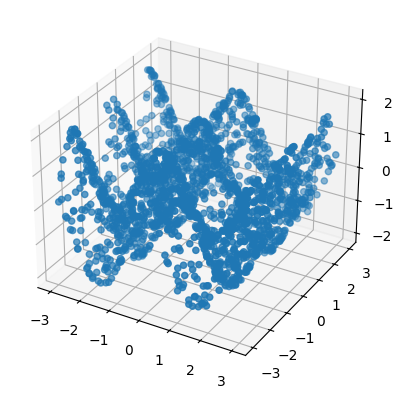

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y);

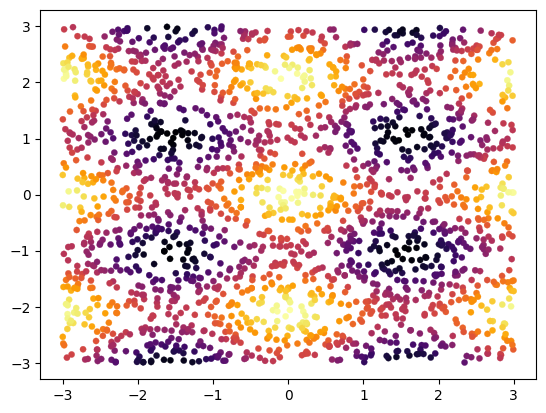

In [4]:
plt.scatter(
    X[:, 0], X[:, 1], c=Y, cmap='inferno',
    linewidths=0.2, s=20, label='Points'
)

In [5]:
#build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [6]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# train the model
def full_gd(model, criterion, optimizer, X_train, Y_train, epochs=1000):
    # stuff to store
    train_losses = np.zeros(epochs)

    for it in range(epochs):
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        # backward and optimize
        loss.backward()
        optimizer.step()
        # save losses
        train_losses[it] = loss.item()

        if (it + 1) % 50 == 0:
            print(f'Epoch {it+1}/{epochs}\tTrain Loss: {loss.item():.3f}')

    return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
Y_train = torch.from_numpy(Y.astype(np.float32)).reshape(-1, 1)
train_losses = full_gd(model, criterion, optimizer, X_train, Y_train)



Epoch 50/1000	Train Loss: 0.612
Epoch 100/1000	Train Loss: 0.293
Epoch 150/1000	Train Loss: 0.188
Epoch 200/1000	Train Loss: 0.066
Epoch 250/1000	Train Loss: 0.023
Epoch 300/1000	Train Loss: 0.008
Epoch 350/1000	Train Loss: 0.005
Epoch 400/1000	Train Loss: 0.013
Epoch 450/1000	Train Loss: 0.004
Epoch 500/1000	Train Loss: 0.003
Epoch 550/1000	Train Loss: 0.004
Epoch 600/1000	Train Loss: 0.002
Epoch 650/1000	Train Loss: 0.019
Epoch 700/1000	Train Loss: 0.002
Epoch 750/1000	Train Loss: 0.002
Epoch 800/1000	Train Loss: 0.002
Epoch 850/1000	Train Loss: 0.002
Epoch 900/1000	Train Loss: 0.002
Epoch 950/1000	Train Loss: 0.002
Epoch 1000/1000	Train Loss: 0.002


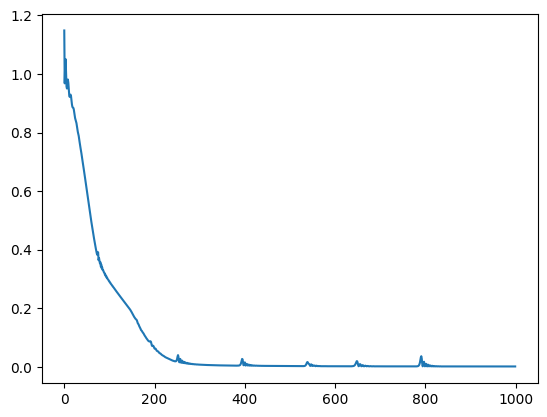

In [8]:
plt.plot(train_losses);

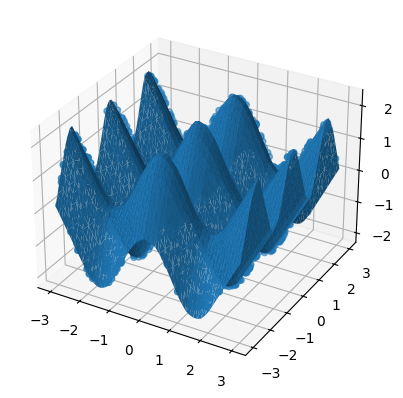

In [9]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T  # converts to an N by 2 array
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
    plt.show();

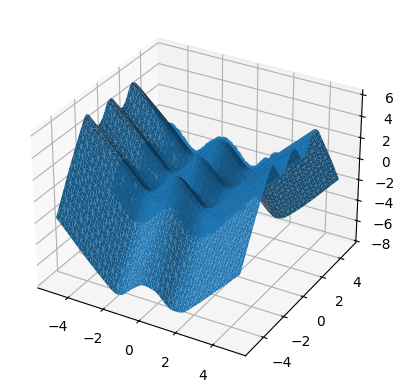

In [10]:
# can it extrapolate?

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T  # converts to an N by 2 array
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
    plt.show();